<a href="https://colab.research.google.com/github/fsajad9/Saeidian/blob/main/non_negative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

%matplotlib inline
sns.set()

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)
X = X.T
print(f"The shape of X is: {X.shape}")
print(f"The shape of y is: {y.shape}")
print(f"The labels are: {list(set(y))}")
max(X[0])
plt.figure(figsize=(16,10))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
The shape of X is: (4096, 400)
The shape of y is: (400,)
The labels are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

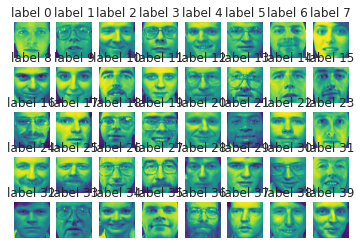

In [3]:
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.imshow(X.T[i*10].reshape(64, 64))
    plt.title(f"label {y[i*10]}")
    plt.set_cmap('viridis')
    plt.axis('off')

In [4]:
class NMF:
    def __init__(self, n_components, n_iterations):
        self.n_components = n_components
        self.n_iterations = n_iterations
        self.losses = []
        self.W = None
        self.H = None

    def compute_loss(self, V, W, H):
        """
        Computes the loss of the present training step
        
        Arguments
        V: Input matrix of dimension (m, n)
        W: Matrix of dimension (m, n_components) computed in NMF
        H: Matrix of dimension (n_components, n) computed in NMF
        
        Returns
        loss: The Frobenius norm of difference beteen the original matrix and the reconstructed matrix
        """
        loss = np.linalg.norm(V - np.dot(W, H))
        return loss
    
    def get_losses(self):
        """
        Returns the losses of all the training steps
        
        Returns
        losses: A list of losses of all training steps
        """
        return self.losses
    
    def fit(self, V):
        """
        Fits the input data to compute the W and H matrices using the multiplicative update rule
        
        Arguments
        V: Input matrix of dimension (m, n)
        
        Returns
        W: Matrix of dimension (m, n_components) computed in NMF
        H: Matrix of dimension (n_components, n) computed in NMF
        """
        W = np.random.rand(V.shape[0], self.n_components)
        H = np.random.rand(self.n_components, V.shape[1])
        for _ in tqdm(range(self.n_iterations)):
            H = H * (np.dot(W.T, V) / np.dot(np.dot(W.T, W), H))
            W = W * (np.dot(V, H.T) / np.dot(np.dot(W, H), H.T))
            self.losses.append(self.compute_loss(V, W, H))
        self.W = W
        self.H = H
    
    def get_matrices(self):
        """
        Returns the learned matrices W and H of the NMF
        
        Returns
        W: Matrix of dimension (m, n_components) computed in NMF
        H: Matrix of dimension (n_components, n) computed in NMF
        """
        return self.W, self.H
    
    def get_components(self):
        """
        Returns the learned components of the NMF
        
        Returns
        W: Matrix of dimension (m, n_component) computed in NMF
        """
        return self.W

    def transform(self):
        """
        Transforms the given matrix into reduced dimensions
        
        Returns
        H: Reduced matrix of dinmension(n_components, n)
        """
        return self.H
        
    def inverse_transform(self):
        """
        Inverse transforms the given matrix into reduced dimensions
        
        Returns
        X: Transformed original matrix of dimension (m, n)
        """
        X = np.dot(self.W, self.H)
        return  X 

In [5]:
n_components = 128 # Number of components in the reduced representation
n_iterations = 100 # Number of iterations to update the weights

model = NMF(n_components, n_iterations)
model.fit(X)
W, H = model.get_matrices() 

100%|██████████| 100/100 [00:11<00:00,  8.47it/s]


Text(0, 0.5, 'Loss')

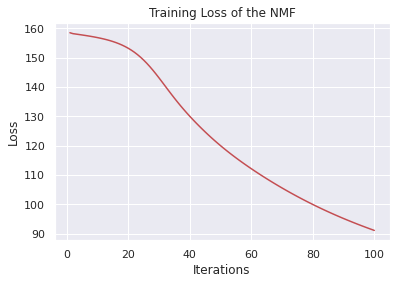

In [6]:
loss = model.get_losses()

plt.plot(range(1,len(loss)+1), loss, color='r')
plt.title('Training Loss of the NMF')
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [7]:
components = model.get_components()
components.shape

(4096, 128)

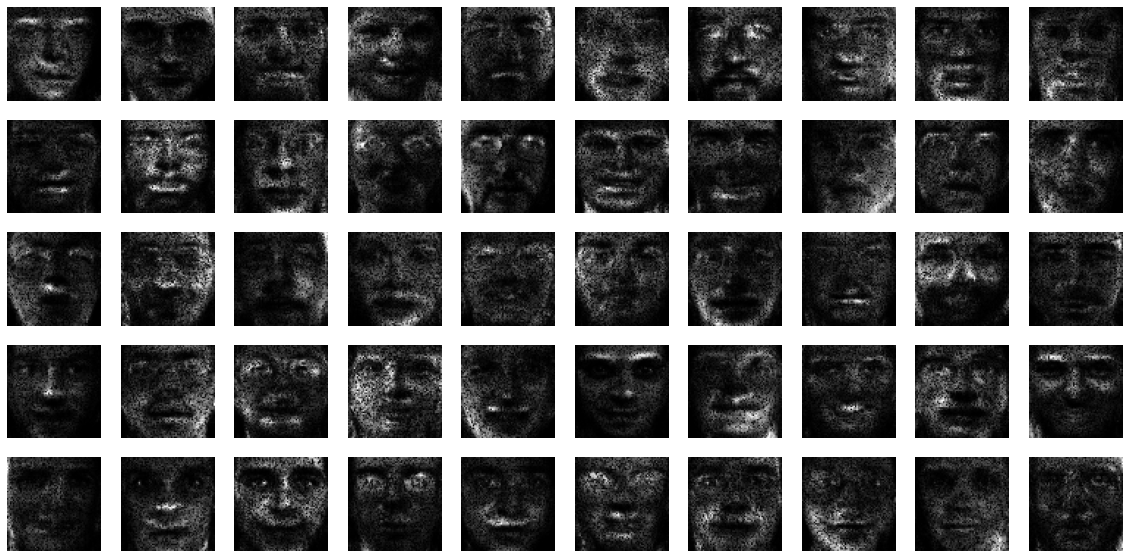

In [8]:
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(components.T[i].reshape(64, 64))
    plt.set_cmap('gray')
    plt.axis('off')

In [9]:
X_transformed = model.transform()
X_retransformed = model.inverse_transform()
print(X_transformed.shape, X_retransformed.shape)

(128, 400) (4096, 400)


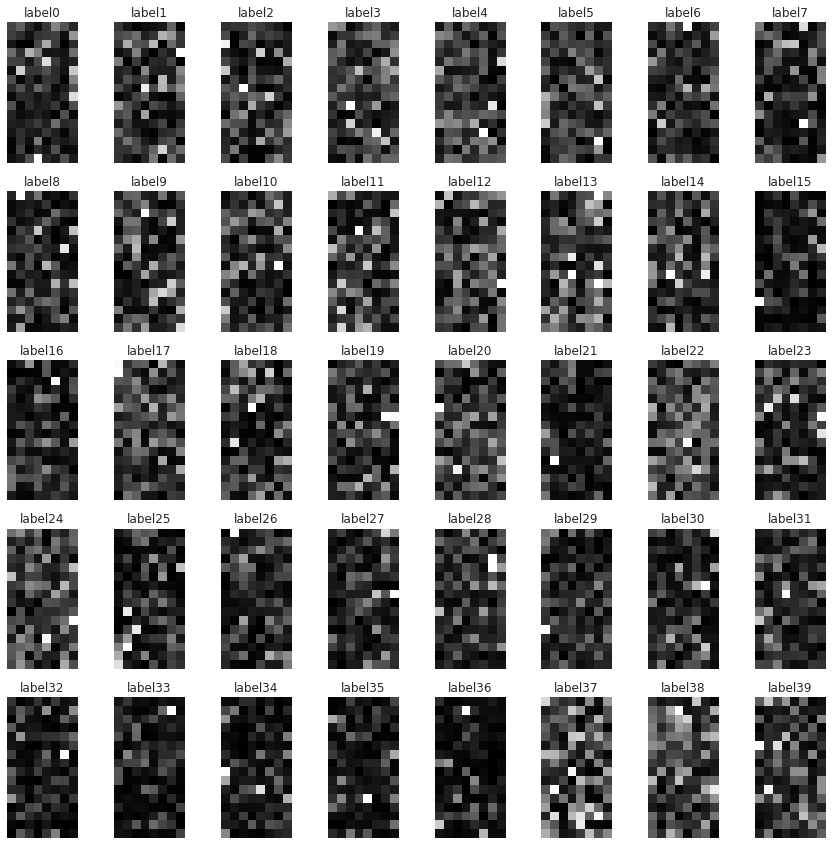

In [10]:
plt.figure(figsize=(15, 15))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.title(f"label{y[i*10]}")
    plt.imshow(X_transformed.T[i*10].reshape(16,8))
    plt.set_cmap('gray')
    plt.axis('off')

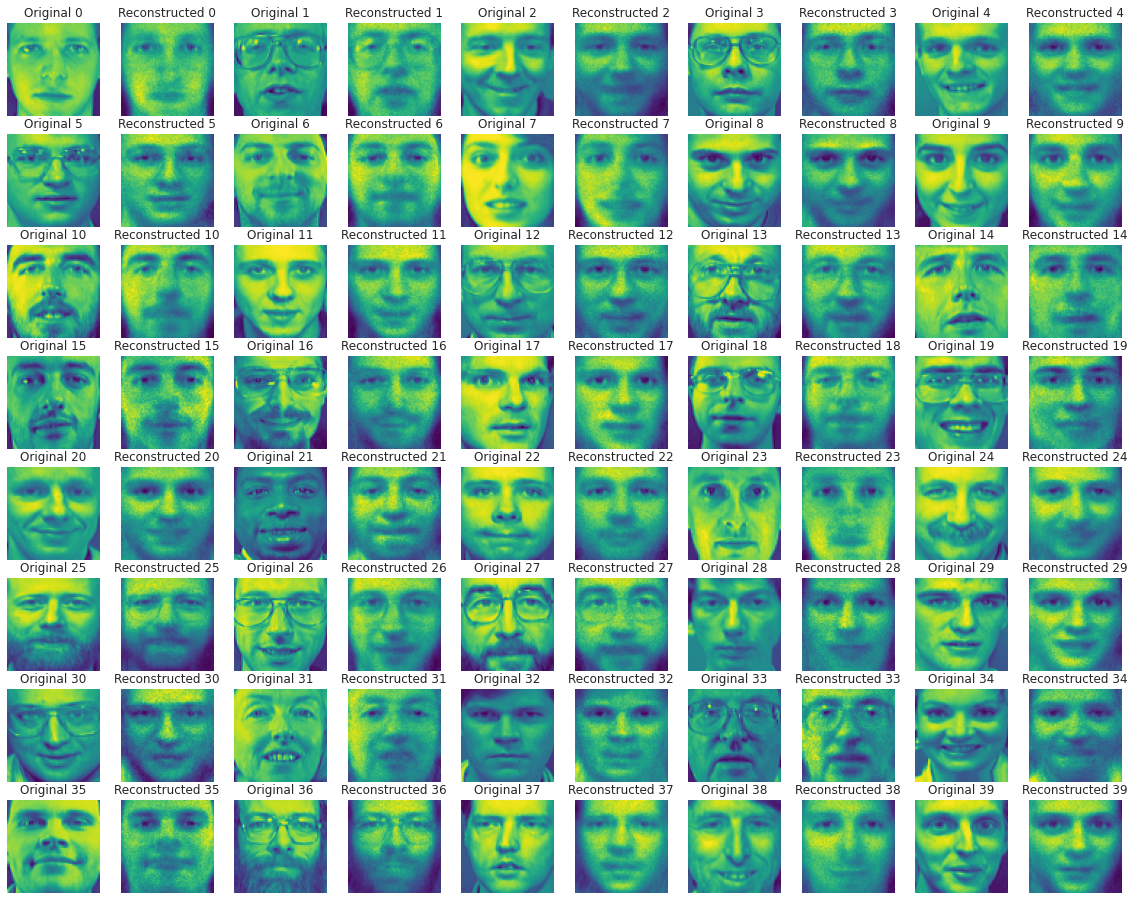

In [11]:
plt.figure(figsize=(20, 16))
for i in range(40):
    plt.subplot(8, 10, i*2 + 1)
    plt.title(f"Original {y[i*10]}")
    plt.imshow(X.T[i*10].reshape(64,64))
    plt.set_cmap('viridis')
    plt.axis('off')
    plt.subplot(8, 10, i*2 + 2)
    plt.title(f"Reconstructed {y[i*10]}")
    plt.imshow(X_retransformed.T[i*10].reshape(64,64))
    plt.set_cmap('viridis')
    plt.axis('off')